## Observations and Insights 

#From this data, it would appear as though Capomulin and Ramicane are the most effective treatments for reducing tumor volume in mice. The most effective treatments appear to reduce tumor volume by approximately 50% over a 45 day trial period. There is a stronge corrolation between mouse weight and average tumor volume. 

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_count=len(mouse_metadata)
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicatemice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupmouse_df = merge_df.loc[merge_df["Mouse ID"] == "g989"]
len(dupmouse_df)

13

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df.drop(merge_df[merge_df['Mouse ID'] == "g989"].index)

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts()

c282    10
j119    10
j365    10
z578    10
w575    10
        ..
o848     1
d133     1
x336     1
f932     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_df=clean_df.groupby(["Drug Regimen"])
tumor_mean=pd.DataFrame(drug_df["Tumor Volume (mm3)"].mean())
tumor_median=pd.DataFrame(drug_df["Tumor Volume (mm3)"].median())
tumor_var=pd.DataFrame(drug_df["Tumor Volume (mm3)"].var())
tumor_std=pd.DataFrame(drug_df["Tumor Volume (mm3)"].std())
tumor_SEM=pd.DataFrame(drug_df["Tumor Volume (mm3)"].sem())

# Label colums
tumor_mean=tumor_mean.rename(columns={"Tumor Volume (mm3)": "Mean"})
tumor_median=tumor_median.rename(columns={"Tumor Volume (mm3)": "Median"})
tumor_var=tumor_var.rename(columns={"Tumor Volume (mm3)": "Varience"})
tumor_std=tumor_std.rename(columns={"Tumor Volume (mm3)": "Standard Deviation"})
tumor_SEM=tumor_SEM.rename(columns={"Tumor Volume (mm3)": "SEM"})

# Combine data frames

drug_stats=[tumor_mean, tumor_median, tumor_var, tumor_std, tumor_SEM]
summary_df=pd.concat(drug_stats, axis=1)
summary_df


,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Mice')

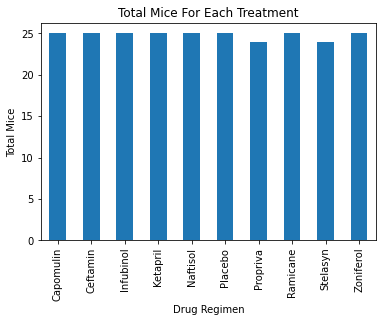

In [8]:
# Count mice in each treatment group
mouse_count=pd.DataFrame(clean_df.groupby("Drug Regimen")['Mouse ID'].nunique())
mouse_count=mouse_count.rename(columns={"Mouse ID":"Total Mice"})

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mouse_count=mouse_count.reset_index()
mouse_count.plot(x ="Drug Regimen", y="Total Mice", kind = "bar", legend=False)
plt.title("Total Mice For Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")

([<matplotlib.axis.XTick at 0x21dd5865970>,
 <a list of 10 Text major ticklabel objects>)

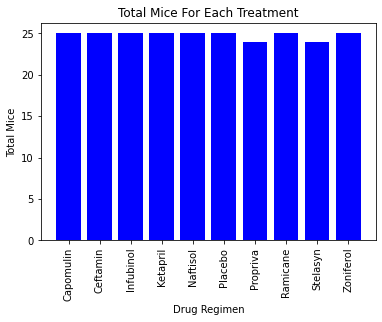

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs=mouse_count["Drug Regimen"]
mice=mouse_count["Total Mice"]

plt.bar(drugs, mice, color="b")

# Give the chart a title, x label, and y label
plt.title("Total Mice For Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")

plt.xticks(drugs, rotation=90)

Text(0, 0.5, '')

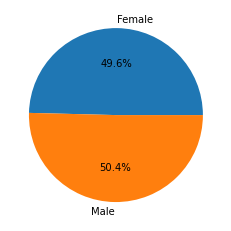

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice=pd.DataFrame(clean_df.groupby("Sex")["Mouse ID"].nunique())
mice=mice.rename(columns={"Mouse ID":"Mice"})
pie = mice.plot.pie(y="Mice", autopct="%1.1f%%", legend=False, figsize=(4, 4))
pie.set_ylabel('')

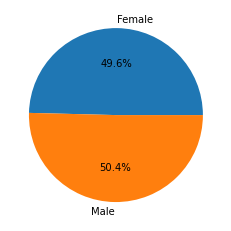

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]
pie=plt.pie(mice["Mice"], autopct="%1.1f%%", labels=labels)


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp=clean_df.groupby("Mouse ID")['Timepoint'].max()
last_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_tp = pd.merge(clean_df, last_tp, on="Mouse ID")
clean_tp=clean_tp[clean_tp['Timepoint_x']==clean_tp['Timepoint_y']]

# Filter out other treatment regimens
top_4=clean_tp[clean_tp["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

In [13]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vol=top_4['Tumor Volume (mm3)']
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
print(f"The IQR={iqr}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    

# Determine outliers using upper and lower bounds
print(f"The maximum tumor volume is {tumor_vol.max()}")
print(f"The minimum tumor volume is {tumor_vol.min()}")


The lower quartile of occupancy is: 37.187743802499995
The upper quartile of occupancy is: 59.930261755000004
The interquartile range of occupancy is: 22.74251795250001
The the median of occupancy is: 45.0 
The IQR=22.74251795250001.
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
The maximum tumor volume is 72.2267309
The minimum tumor volume is 22.05012627


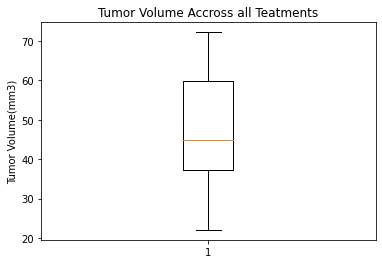

In [14]:
#Display box plot for Tumor volume accross all treatments
tumor_vol=top_4['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Accross all Teatments')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_vol, showfliers=True)
plt.show()     

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.125164399999996 
The IQR=7.781863460000004.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The maximum tumor volume is 47.68596303
The minimum tumor volume is 23.34359787


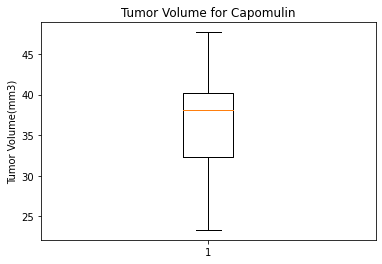

In [15]:
#Create box plot for Capomulin
Capomulin=top_4.loc[top_4["Drug Regimen"]=="Capomulin"]

tumor_vol=Capomulin['Tumor Volume (mm3)']
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
print(f"The IQR={iqr}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
print(f"The maximum tumor volume is {tumor_vol.max()}")
print(f"The minimum tumor volume is {tumor_vol.min()}")

tumor_vol=Capomulin['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Capomulin')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_vol, showfliers=True)
plt.show()   


The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
The IQR=9.098536719999998.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The maximum tumor volume is 45.22086888
The minimum tumor volume is 22.05012627


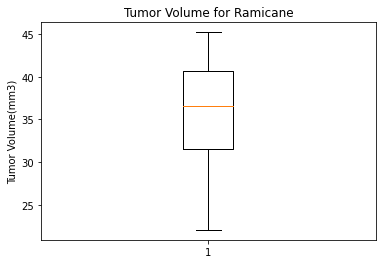

In [16]:
#Create box plot for Ramicane
Ramicane=top_4.loc[top_4["Drug Regimen"]=="Ramicane"]

tumor_vol=Ramicane['Tumor Volume (mm3)']
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
print(f"The IQR={iqr}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
print(f"The maximum tumor volume is {tumor_vol.max()}")
print(f"The minimum tumor volume is {tumor_vol.min()}")

tumor_vol=Ramicane['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Ramicane')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_vol, showfliers=True)
plt.show()   

The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
The IQR=11.477135160000003.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The maximum tumor volume is 72.2267309
The minimum tumor volume is 36.321345799999996


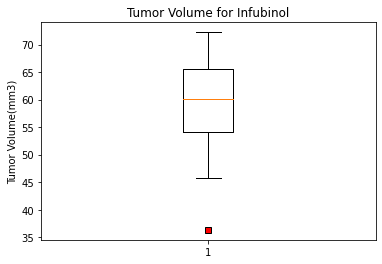

In [17]:
#Create box plot for Infubinol
Infubinol=top_4.loc[top_4["Drug Regimen"]=="Infubinol"]

tumor_vol=Infubinol['Tumor Volume (mm3)']
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
print(f"The IQR={iqr}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
print(f"The maximum tumor volume is {tumor_vol.max()}")
print(f"The minimum tumor volume is {tumor_vol.min()}")

tumor_vol=Infubinol['Tumor Volume (mm3)']

red_square = dict(markerfacecolor='r', marker='s')

fig1, ax1 = plt.subplots()

ax1.set_title('Tumor Volume for Infubinol')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_vol, showfliers=True, flierprops=red_square)
plt.show()   

The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
The IQR=15.577752179999997.
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
The maximum tumor volume is 68.92318457
The minimum tumor volume is 45.0


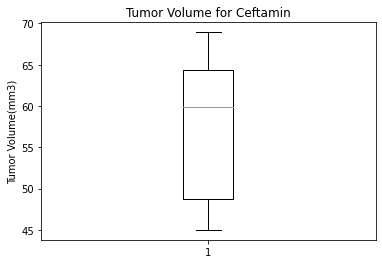

In [18]:
#Create box plot for Ceftamin
Ceftamin=top_4.loc[top_4["Drug Regimen"]=="Ceftamin"]

tumor_vol=Ceftamin['Tumor Volume (mm3)']
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
print(f"The IQR={iqr}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
print(f"The maximum tumor volume is {tumor_vol.max()}")
print(f"The minimum tumor volume is {tumor_vol.min()}")

tumor_vol=Ceftamin['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Ceftamin')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_vol, showfliers=True)
plt.show()   


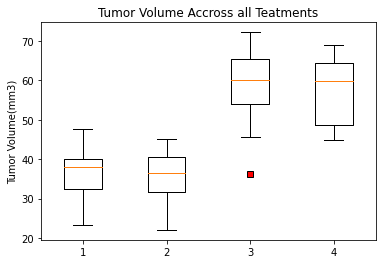

1=Capomulin 2=Ramicane 3=Infubinol 4=Ceftamin


In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Store data for each treatment
Capomulin=top_4.loc[top_4["Drug Regimen"]=="Capomulin"]
Ramicane=top_4.loc[top_4["Drug Regimen"]=="Ramicane"]
Infubinol=top_4.loc[top_4["Drug Regimen"]=="Infubinol"]
Ceftamin=top_4.loc[top_4["Drug Regimen"]=="Ceftamin"]

data_1=Capomulin["Tumor Volume (mm3)"]
data_2=Ramicane["Tumor Volume (mm3)"]
data_3=Infubinol["Tumor Volume (mm3)"]
data_4=Ceftamin["Tumor Volume (mm3)"]

data = [data_1, data_2, data_3, data_4]  

# Generate box plot 
fig1, ax = plt.subplots()
ax.set_title('Tumor Volume Accross all Teatments')
ax.set_ylabel('Tumor Volume(mm3)')
ax.set_xticklabels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
ax.boxplot(data, showfliers=True, flierprops=red_square)


plt.show() 

print("1=Capomulin 2=Ramicane 3=Infubinol 4=Ceftamin")



## Line and Scatter Plots

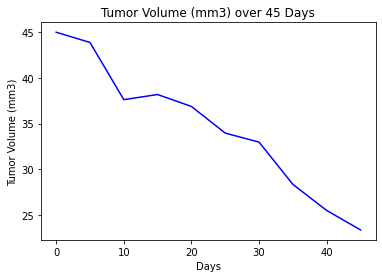

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin=clean_df[clean_df["Drug Regimen"].isin(["Capomulin"])]
s185=Capomulin[Capomulin["Mouse ID"].isin(["s185"])]
s185_line=plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"], color="blue", label="Tumor Volume")
plt.title("Tumor Volume (mm3) over 45 Days")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")

s185_line


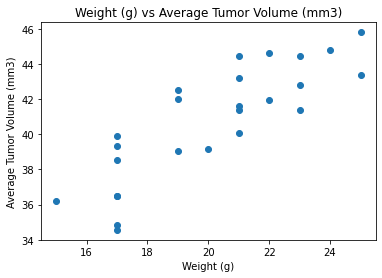

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(Capomulin.groupby("Mouse ID")["Weight (g)"].mean(), Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
plt.title("Weight (g) vs Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The r-squared is: 0.7088568047708717
The correlation between both factors is 0.84


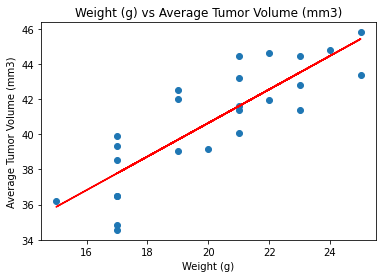

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Store mouse wight and avg tumor volume data
weight=Capomulin.groupby("Mouse ID")["Weight (g)"].mean()
avg_vol=Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Calculate Pearson's correlation coefficient
correlation = st.pearsonr(weight,avg_vol)

#Generate scatter plot
plt.scatter(Capomulin.groupby("Mouse ID")["Weight (g)"].mean(), Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())

#Plot regression
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(14,35),fontsize=15,color="red")

#Label plot
plt.title("Weight (g) vs Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Compare the calcualted Pearson's r to the plots
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()